In [1]:
import networkx as nx
from typing import Dict, List, Tuple
import numpy as np
from collections import Counter
from src.modules import Node, Network
from src.new_network import TheoreticalNetwork
np.random.seed(1)
from src.new_modules import *
import joblib
import pandas as pd
import numpy as np

w_media_empirical = pd.read_csv('./new_output/empirical/w_media_risk_data_7days.csv')
o_people_empirical = pd.read_csv('./new_output/empirical/sentiment_data_7days.csv')
m_media_empirical = pd.read_csv('./new_output/empirical/m_media_risk_data_7days.csv')
emp_w_risk_p = dict(zip(w_media_empirical['period_id_3d'], w_media_empirical['risk_p']))
emp_m_risk_p = dict(zip(m_media_empirical['period_id_3d'], m_media_empirical['risk_p']))
emp_sentiment_high_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['high_p']))
emp_sentiment_middle_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['middle_p']))
emp_sentiment_low_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['low_p']))

empirical_data = {
    'w_risk_p': emp_w_risk_p,
    'm_risk_p': emp_m_risk_p,
    'sentiment_high_p': emp_sentiment_high_p,
    'sentiment_middle_p': emp_sentiment_middle_p,
    'sentiment_low_p': emp_sentiment_low_p
}


In [2]:
ba_network_path = 'networks/ba_network.pkl'
random_network_path = 'networks/random_network.pkl'
ws_network_path = 'networks/ws_network.pkl'
ba_results = joblib.load('output/other_network/ba_results.pkl')
ba_params = ba_results['best_params']

random_results = joblib.load('output/other_network/random_results.pkl')
random_params = random_results['best_params']

ws_results = joblib.load('output/other_network/ws_results.pkl')
ws_params = ws_results['best_params']

In [3]:
import pickle
import pandas as pd
from src.modules import *
# with open('abc_results/abc_results.pkl', 'rb') as f:
#     abc_results = pickle.load(f)
with open('abc_results/abc_results_second.pkl', 'rb') as f:
    abc_results = pickle.load(f)
best_params = abc_results['best_params']
# 加载网络
print("Loading network...")
network = joblib.load('networks/simple_all_new.pkl')
# 在运行模拟之前设置属性
setattr(network, 't', 0)
setattr(network, 'history', [])
print("Network loaded successfully")

# 运行模拟
print("Starting simulation...")
csdag_history = network.simulate_steps(
    steps=96,
    **best_params
)
print("Simulation completed")

Loading network...
Network loaded successfully
Starting simulation...
Simulation completed


In [4]:
ba_network = joblib.load(ba_network_path)
random_network = joblib.load(random_network_path)
ws_network = joblib.load(ws_network_path)

ba_history = ba_network.simulate_steps(steps=96, **ba_params)
random_history = random_network.simulate_steps(steps=96, **random_params)
ws_history = ws_network.simulate_steps(steps=96, **ws_params)

In [5]:
from src.other_modules import process_history, calculate_error_detailed
ba_avg_result = process_history(ba_history)
random_avg_result = process_history(random_history)
ws_avg_result = process_history(ws_history)
csdag_avg_result = process_history(csdag_history)
ba_error_detailed = calculate_error_detailed(ba_avg_result, empirical_data)
random_error_detailed = calculate_error_detailed(random_avg_result, empirical_data)
ws_error_detailed = calculate_error_detailed(ws_avg_result, empirical_data)
csdag_error_detailed = calculate_error_detailed(csdag_avg_result, empirical_data)

In [9]:
print(ba_error_detailed['metric_errors'])
print(random_error_detailed['metric_errors'])
print(ws_error_detailed['metric_errors'])
print(csdag_error_detailed['metric_errors'])


{'w_risk_p': 0.13818870823037027, 'm_risk_p': 0.24500525995397776, 'sentiment_high_p': 0.06464115431913753, 'sentiment_middle_p': 0.060902249062269924, 'sentiment_low_p': 0.040223538905598266}
{'w_risk_p': 0.14547550136144952, 'm_risk_p': 0.23516376904516456, 'sentiment_high_p': 0.05259080876830715, 'sentiment_middle_p': 0.059737860712898834, 'sentiment_low_p': 0.04091787290312867}
{'w_risk_p': 0.17499307831354688, 'm_risk_p': 0.20747850970101356, 'sentiment_high_p': 0.05290844365289124, 'sentiment_middle_p': 0.13096019560955344, 'sentiment_low_p': 0.12190254460141954}
{'w_risk_p': 0.13991668899610862, 'm_risk_p': 0.23868837245738922, 'sentiment_high_p': 0.06658556240040205, 'sentiment_middle_p': 0.05636040823676803, 'sentiment_low_p': 0.04887133493838842}


In [6]:
# 准备模型数据
models_data = {
    'CSDAG': csdag_avg_result,
    'BA': ba_avg_result,
    'Random': random_avg_result,
    'WS': ws_avg_result
}

# 准备经验数据
empirical_data = {
    'w_risk_p': emp_w_risk_p,
    'm_risk_p': emp_m_risk_p,
    'sentiment_high_p': emp_sentiment_high_p,
    'sentiment_middle_p': emp_sentiment_middle_p,
    'sentiment_low_p': emp_sentiment_low_p
}


C:\Users\wujlin\AppData\Local\Temp\ipykernel_18284\404185616.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


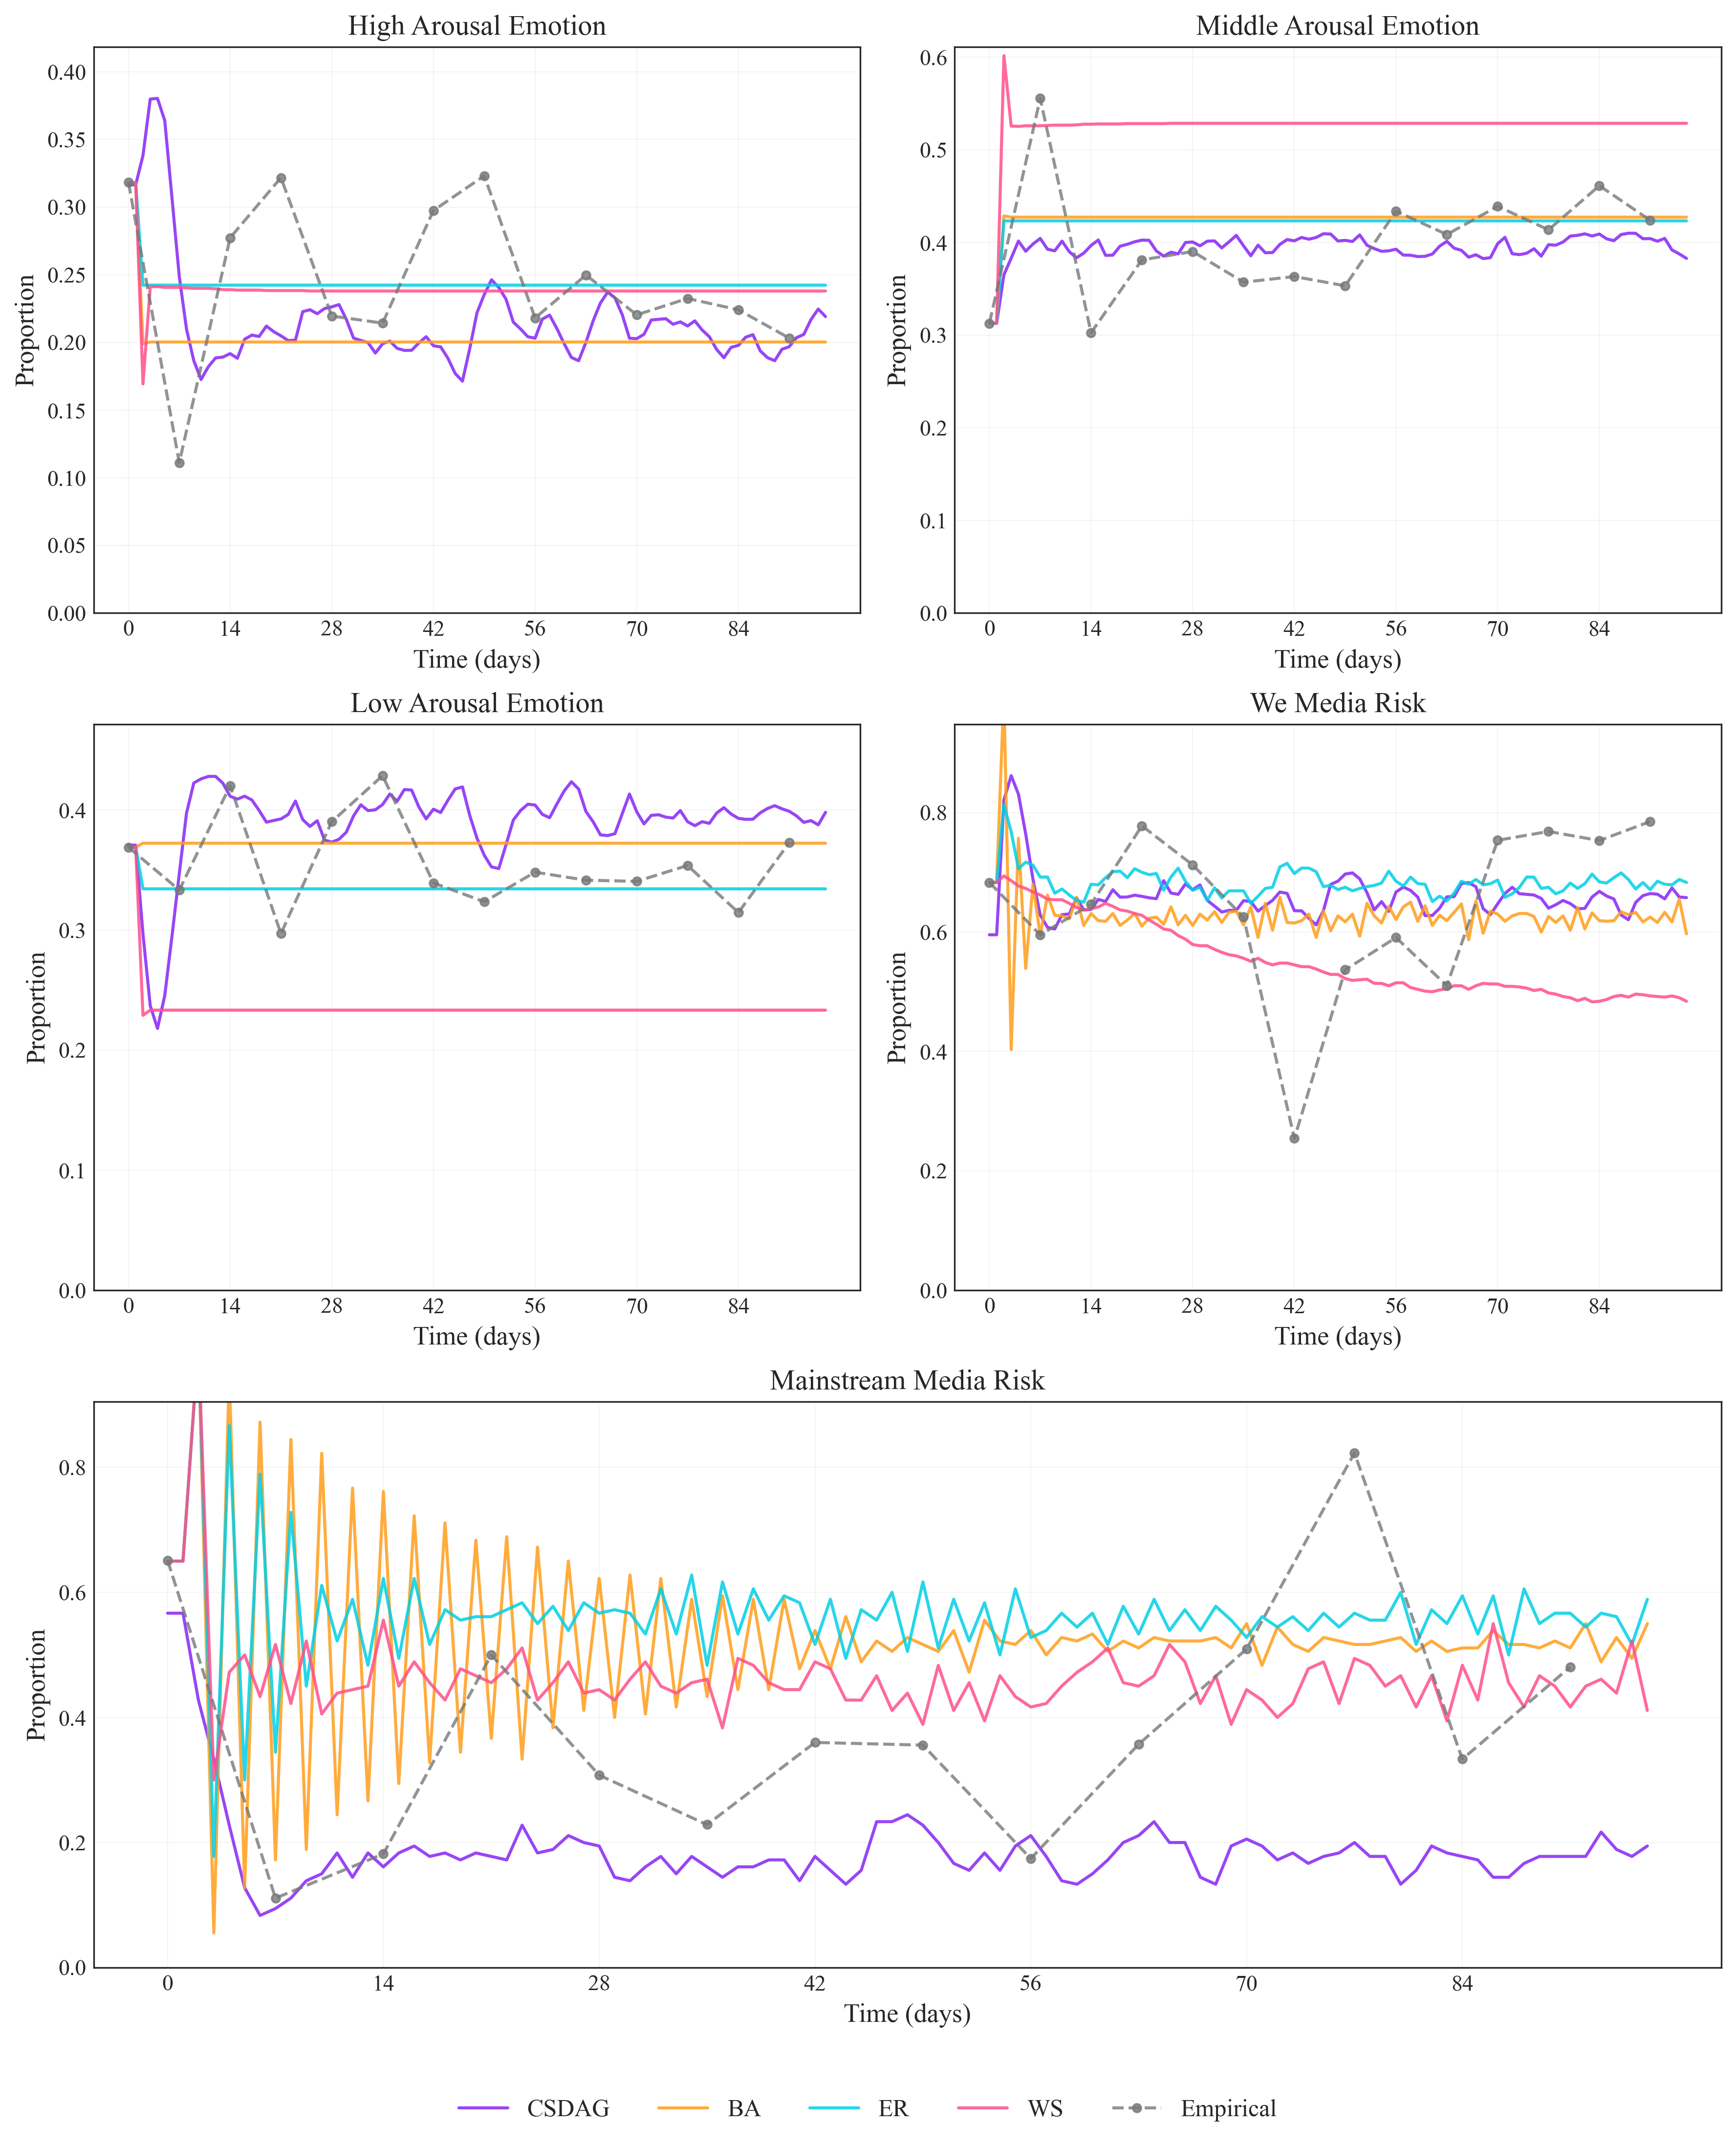

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# 设置绘图风格
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5
})

# 创建图形
fig = plt.figure(figsize=(12, 15), dpi=300)
gs = GridSpec(3, 2, figure=fig)
axs = [
    fig.add_subplot(gs[0, 0]),  # High Arousal
    fig.add_subplot(gs[0, 1]),  # Middle Arousal
    fig.add_subplot(gs[1, 0]),  # Low Arousal
    fig.add_subplot(gs[1, 1]),  # We Media Risk
    fig.add_subplot(gs[2, :]),  # Mainstream Media Risk
]

# 新的配色方案
colors = {
    'csdag': '#8624F5',      # 紫色
    'ba': '#FF9E1B',         # 金色
    'random': '#00CFE6',     # 青色
    'ws': '#FF4F8B',         # 粉色
    'empirical': '#76787a'   # 灰色
}

# 时间轴
days = np.arange(len(csdag_history))
emp_days = np.arange(0, len(emp_sentiment_high_p) * 7, 7)

# 定义数据映射关系
data_mapping = {
    'sentiment_high_p': ('o_people', 'H'),
    'sentiment_middle_p': ('o_people', 'M'),
    'sentiment_low_p': ('o_people', 'L'),
    'w_risk_p': ('w_media', 'R'),
    'm_risk_p': ('m_media', 'R')
}

titles = ['High Arousal Emotion', 'Middle Arousal Emotion', 
          'Low Arousal Emotion', 'We Media Risk', 'Mainstream Media Risk']
metrics = ['sentiment_high_p', 'sentiment_middle_p', 
          'sentiment_low_p', 'w_risk_p', 'm_risk_p']

for ax, title, metric in zip(axs, titles, metrics):
    # 获取对应的键值
    category, key = data_mapping[metric]
    
    # 提取模型预测数据
    csdag_values = [step[category][key] for step in csdag_history]
    ba_values = [step[category][key] for step in ba_history]
    random_values = [step[category][key] for step in random_history]
    ws_values = [step[category][key] for step in ws_history]
    
    # 绘制模型预测
    ax.plot(days, csdag_values, 
            color=colors['csdag'], label='CSDAG', alpha=0.85)
    ax.plot(days, ba_values, 
            color=colors['ba'], label='BA', alpha=0.85)
    ax.plot(days, random_values, 
            color=colors['random'], label='ER', alpha=0.85)
    ax.plot(days, ws_values, 
            color=colors['ws'], label='WS', alpha=0.85)
    
    # 绘制经验数据
    emp_data = empirical_data[metric]
    ax.plot(emp_days, list(emp_data.values()), 
            color=colors['empirical'], linestyle='--', 
            marker='o', markersize=4, label='Empirical', alpha=0.8)
    
    ax.set_title(title)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Proportion')
    ax.grid(True, alpha=0.2)
    
    # 设置x轴刻度
    ax.set_xticks(np.arange(0, max(days), 14))
    
    # 调整y轴范围
    ax.set_ylim(0, max(max(csdag_values), 
                       max(list(emp_data.values()))) * 1.1)

# 添加统一图例
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
          bbox_to_anchor=(0.5, 0.02), 
          loc='lower center', 
          ncol=5,
          frameon=False)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# plt.savefig('graph/Figure 8.png', dpi=300, bbox_inches='tight')

plt.show()